# CS235 Midterm Report
### Neural Network | Ryan Chandler

### Importing required packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import plotly.express as px

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('amazon_data.csv')
df = df.drop('title', axis=1)
df = df.drop('Unnamed: 0', axis=1)

df.head()

,stars,reviews,price,listPrice,category,isBestSeller,boughtInLastMonth
0,4.5,0,139.99,0.00,Suitcases,False,2000
1,4.5,0,169.99,209.99,Suitcases,False,1000
2,4.6,0,365.49,429.99,Suitcases,False,300
3,4.6,0,291.59,354.37,Suitcases,False,400
4,4.5,0,174.99,309.99,Suitcases,False,400


# Data Preprocessing

In [3]:
df['reviews'] = (df['reviews'] - df['reviews'].mean()) / df['reviews'].std()
df['stars'] = (df['stars'] - df['stars'].mean()) / df['stars'].std()
df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()
df['listPrice'] = (df['listPrice'] - df['listPrice'].mean()) / df['listPrice'].std()
df['boughtInLastMonth'] = (df['boughtInLastMonth'] - df['boughtInLastMonth'].mean()) / df['boughtInLastMonth'].std()

df.head()

,stars,reviews,price,listPrice,category,isBestSeller,boughtInLastMonth
0,0.372306,-0.102615,0.741539,-0.269977,Suitcases,False,2.221786
1,0.372306,-0.102615,0.971796,4.283937,Suitcases,False,1.026003
2,0.446695,-0.102615,2.472303,9.054931,Suitcases,False,0.188955
3,0.446695,-0.102615,1.905104,7.415010,Suitcases,False,0.308533
4,0.372306,-0.102615,1.010172,6.452571,Suitcases,False,0.308533


In [4]:
#weight_star = 0.3
#weight_review = 0.3
#weight_recent_purchase = 0.6

#df['weighted_score'] = (df['stars'] * weight_star) + (df['reviews'] * weight_review) + (df['boughtInLastMonth'] * weight_recent_purchase)

#df.head()

### One-Hot Encoding

In [5]:
oh_df = pd.get_dummies(df, columns=['category']) # One-hot encoding on categories data
oh_df = oh_df.astype({col: int for col in oh_df.columns if 'category_' in col}) #

#df -> dataset w/o one-hot encoding
oh_df.head()


,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_Abrasive & Finishing Products,category_Accessories & Supplies,category_Additive Manufacturing Products,category_Arts & Crafts Supplies,...,category_Women's Accessories,category_Women's Clothing,category_Women's Handbags,category_Women's Jewelry,category_Women's Shoes,category_Women's Watches,"category_Xbox 360 Games, Consoles & Accessories","category_Xbox One Games, Consoles & Accessories","category_Xbox Series X & S Consoles, Games & Accessories",category_eBook Readers & Accessories
0,0.372306,-0.102615,0.741539,-0.269977,False,2.221786,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.372306,-0.102615,0.971796,4.283937,False,1.026003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.446695,-0.102615,2.472303,9.054931,False,0.188955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.446695,-0.102615,1.905104,7.415010,False,0.308533,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.372306,-0.102615,1.010172,6.452571,False,0.308533,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sampling

In [58]:
maj_df = oh_df[oh_df['isBestSeller'] == False]
min_df = oh_df[oh_df['isBestSeller'] == True]

maj_df = maj_df.sample(n=3*len(min_df))
sampled_df = pd.concat([maj_df, min_df])

sampled_df = sampled_df.sample(frac=1) #randomly sorts it

print(sampled_df['isBestSeller'].value_counts())

sampled_df

isBestSeller
False    25560
True      8520
Name: count, dtype: int64


,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_Abrasive & Finishing Products,category_Accessories & Supplies,category_Additive Manufacturing Products,category_Arts & Crafts Supplies,...,category_Women's Accessories,category_Women's Clothing,category_Women's Handbags,category_Women's Jewelry,category_Women's Shoes,category_Women's Watches,"category_Xbox 360 Games, Consoles & Accessories","category_Xbox One Games, Consoles & Accessories","category_Xbox Series X & S Consoles, Games & Accessories",category_eBook Readers & Accessories
387030,0.521083,-0.102615,-0.141112,-0.269977,False,2.221786,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171664,0.372306,-0.033921,0.089145,-0.269977,False,-0.169780,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157686,0.595472,-0.097505,-0.202821,-0.269977,False,0.069377,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009247,0.149140,-0.102615,-0.156463,-0.269977,True,11.788052,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319590,0.372306,-0.102615,0.073794,1.291223,True,2.221786,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569737,0.744249,-0.102615,-0.332916,-0.269977,False,-0.169780,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91282,0.595472,-0.056062,-0.156463,-0.269977,False,-0.169780,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1306206,0.372306,-0.102615,-0.148787,-0.269977,False,0.069377,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
442136,0.372306,-0.102615,-0.141112,-0.269977,False,-0.169780,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Neural Network

### Importing required libraries

In [59]:
import torch.nn as nn
import torch.nn.functional as F
import torch

from torch.utils.data import DataLoader, TensorDataset

### Preparing the dataloader

In [123]:
X = sampled_df.drop('isBestSeller', axis=1).values
y = sampled_df['isBestSeller'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True) #larger is faster, but maybe more generalized?
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

### Initializing the Model

In [124]:
class Model(nn.Module) :
    #input layer --> hidden layer (# of neurons) -> output
    def __init__(self, X, neurons, hidden_layers, dropout_rate = 0.10) :
        super(Model, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], neurons)
        self.dropout = nn.Dropout(dropout_rate)
        fcarray = []
        for k in range(hidden_layers) :
            fcarray.append(nn.Linear(neurons//(2**(k)), neurons//(2**(k + 1))))
        self.fcarray = fcarray
        self.out = nn.Linear(neurons//(2**hidden_layers),1)
    def forward(self, x) :
        x = F.leaky_relu(self.fc1(x), negative_slope=0.1)
        x = self.dropout(x)
        count = 0
        for layer in self.fcarray :
            if count == 0:
                x = F.leaky_relu(layer(x), negative_slope=0.1)
            else :
                x = F.leaky_relu(layer(x), negative_slope=0.1)
            count += 1
        x = F.sigmoid(self.out(x))
        return x

In [125]:
class BaseModel(nn.Module) :
    #input layer --> hidden layer (# of neurons) -> output
    def __init__(self, X) :
        super(BaseModel, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 8)
        self.out = nn.Linear(8,1)
    def forward(self, x) :
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.out(x))
        return x

### Training the Regular Model

In [126]:
model = Model(X_train, 32, 3)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
num_epochs = 50
losses = []
for epoch in range(num_epochs) :
    model.train()
    for inputs, labels in train_loader :
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/50, Loss: 0.4380413293838501
Epoch 2/50, Loss: 0.38170135021209717
Epoch 3/50, Loss: 0.35074934363365173
Epoch 4/50, Loss: 0.4023018777370453
Epoch 5/50, Loss: 0.38988977670669556
Epoch 6/50, Loss: 0.2541806697845459
Epoch 7/50, Loss: 0.2725825309753418
Epoch 8/50, Loss: 0.298803448677063
Epoch 9/50, Loss: 0.35619843006134033
Epoch 10/50, Loss: 0.3583610951900482
Epoch 11/50, Loss: 0.3227071464061737
Epoch 12/50, Loss: 0.3059104382991791
Epoch 13/50, Loss: 0.28482571244239807
Epoch 14/50, Loss: 0.3467530608177185
Epoch 15/50, Loss: 0.359073281288147
Epoch 16/50, Loss: 0.3065876066684723
Epoch 17/50, Loss: 0.3541792929172516
Epoch 18/50, Loss: 0.24822509288787842
Epoch 19/50, Loss: 0.3542291224002838
Epoch 20/50, Loss: 0.37396183609962463
Epoch 21/50, Loss: 0.40521854162216187
Epoch 22/50, Loss: 0.39110085368156433
Epoch 23/50, Loss: 0.2863788604736328
Epoch 24/50, Loss: 0.26534372568130493
Epoch 25/50, Loss: 0.30030083656311035
Epoch 26/50, Loss: 0.2570168375968933
Epoch 27/50,

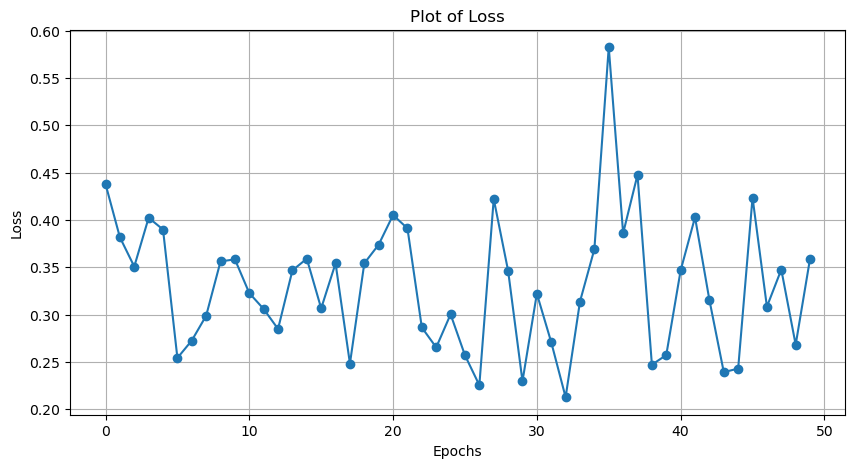

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(losses, marker='o')
plt.title('Plot of Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True) 
plt.show()

### Evaluating the Model - Against Testing

In [128]:
from sklearn.metrics import confusion_matrix

model.eval()

with torch.no_grad():
    true_labels = []
    predicted_labels = []

    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs.data > 0.5).int() 
        true_labels.extend(labels.int().tolist())
        predicted_labels.extend(predicted.tolist())

confusion = confusion_matrix(true_labels, predicted_labels)

tn, fp, fn, tp = confusion.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:')
print(confusion)

Accuracy: 87.51%
Precision: 78.67%
Recall: 67.32%
F1 Score: 0.7256
Confusion Matrix:
[[4840  305]
 [ 546 1125]]


### Evaluating the Model - Against Training

In [129]:
model.eval()

with torch.no_grad():
    true_labels = []
    predicted_labels = []

    for inputs, labels in train_loader:
        outputs = model(inputs)
        predicted = (outputs.data > 0.5).int()
        true_labels.extend(labels.int().tolist())
        predicted_labels.extend(predicted.tolist())

confusion = confusion_matrix(true_labels, predicted_labels)

tn, fp, fn, tp = confusion.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1:.4f}')

print(f'Confusion Matrix:')
print(confusion)

Accuracy: 87.98%
Precision: 80.91%
Recall: 68.26%
F1 Score: 0.7405
Confusion Matrix:
[[19312  1103]
 [ 2174  4675]]


### Training the Baseline Model

In [130]:
model = BaseModel(X_train)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100
losses = []

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

for epoch in range(num_epochs) :
    model.train()
    for inputs, labels in train_loader :
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/50, Loss: 0.4292882978916168
Epoch 2/50, Loss: 0.39840537309646606
Epoch 3/50, Loss: 0.2600909471511841
Epoch 4/50, Loss: 0.6284265518188477
Epoch 5/50, Loss: 0.38107359409332275
Epoch 6/50, Loss: 0.33165624737739563
Epoch 7/50, Loss: 0.19319386780261993
Epoch 8/50, Loss: 0.35096240043640137
Epoch 9/50, Loss: 0.2723900079727173
Epoch 10/50, Loss: 0.415370374917984
Epoch 11/50, Loss: 0.2993813157081604
Epoch 12/50, Loss: 0.19303801655769348
Epoch 13/50, Loss: 0.30608460307121277
Epoch 14/50, Loss: 0.25740987062454224
Epoch 15/50, Loss: 0.2663290500640869
Epoch 16/50, Loss: 0.24752898514270782
Epoch 17/50, Loss: 0.4450001120567322
Epoch 18/50, Loss: 0.21373838186264038
Epoch 19/50, Loss: 0.3034950792789459
Epoch 20/50, Loss: 0.5040069818496704
Epoch 21/50, Loss: 0.38558024168014526
Epoch 22/50, Loss: 0.2907799184322357
Epoch 23/50, Loss: 0.40335947275161743
Epoch 24/50, Loss: 0.23865990340709686
Epoch 25/50, Loss: 0.3716179132461548
Epoch 26/50, Loss: 0.32733774185180664
Epoch 27

### Evaluating the Baseline Model Against Testing

In [131]:
from sklearn.metrics import confusion_matrix

model.eval()

with torch.no_grad():
    true_labels = []
    predicted_labels = []

    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs.data > 0.5).int() 
        true_labels.extend(labels.int().tolist())
        predicted_labels.extend(predicted.tolist())

confusion = confusion_matrix(true_labels, predicted_labels)

tn, fp, fn, tp = confusion.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:')
print(confusion)

Accuracy: 87.47%
Precision: 77.62%
Recall: 68.70%
F1 Score: 0.7289
Confusion Matrix:
[[4814  331]
 [ 523 1148]]


# Cross Validation

### Dataloader

In [135]:
from sklearn.model_selection import KFold

k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=13)

X = sampled_df.drop('isBestSeller', axis=1).values
y = sampled_df['isBestSeller'].values

X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

total_data = TensorDataset(X, y)

### Training Process for Each Fold

In [136]:
for fold, (train_ids, test_ids) in enumerate(kfold.split(X)):
    print(f'Current Fold: {fold+1}')
    print('--------------------------------')

    X_train, X_val = X[train_ids], X[test_ids]
    y_train, y_val = y[train_ids], y[test_ids]

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=1, shuffle=False)

    results = []

    model = Model(X_train, 16, 3)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    num_epochs = 100
    losses = []

    for epoch in range(num_epochs) :
        model.train()
        for inputs, labels in train_loader :
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.view(-1, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()    

    model.eval()
    with torch.no_grad():
        true_labels = []
        predicted_labels = []

        for inputs, labels in val_loader:
            outputs = model(inputs)
            predicted = (outputs.data > 0.5).int()
            true_labels.extend(labels.int().tolist())
            predicted_labels.extend(predicted.tolist())

    confusion = confusion_matrix(true_labels, predicted_labels)
    results.append(confusion)

    tn, fp, fn, tp = confusion.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)

    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1:.4f}')

    print(f'Confusion Matrix:')
    print(confusion)


Current Fold: 1
--------------------------------
Accuracy: 85.71%
Precision: 81.12%
Recall: 57.04%
F1 Score: 0.6698
Confusion Matrix:
[[4854  230]
 [ 744  988]]
Current Fold: 2
--------------------------------
Accuracy: 86.83%
Precision: 78.30%
Recall: 66.20%
F1 Score: 0.7174
Confusion Matrix:
[[4778  316]
 [ 582 1140]]
Current Fold: 3
--------------------------------
Accuracy: 85.43%
Precision: 80.42%
Recall: 54.75%
F1 Score: 0.6515
Confusion Matrix:
[[4895  226]
 [ 767  928]]
Current Fold: 4
--------------------------------
Accuracy: 87.12%
Precision: 78.44%
Recall: 66.05%
F1 Score: 0.7171
Confusion Matrix:
[[4825  306]
 [ 572 1113]]
Current Fold: 5
--------------------------------
Accuracy: 86.97%
Precision: 79.51%
Recall: 63.76%
F1 Score: 0.7077
Confusion Matrix:
[[4853  277]
 [ 611 1075]]


### Combined Results

In [137]:
tn_sum, fp_sum, fn_sum, tp_sum = 0, 0, 0, 0
for confusion in results :
    tn, fp, fn, tp = confusion.ravel()
    tn_sum += tn
    fp_sum += fp
    fn_sum += fn
    tp_sum += tp

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1:.4f}')

print(f'Confusion Matrix:')
print(confusion)
print('--------------------------------')

Accuracy: 86.97%
Precision: 79.51%
Recall: 63.76%
F1 Score: 0.7077
Confusion Matrix:
[[4853  277]
 [ 611 1075]]
--------------------------------
